# Training

In [1]:
# Important libraries
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import random

# File paths
fp_notebooks_folder = "./"
fp_code_folder = "../"
fp_processed_folder = os.path.join(fp_code_folder, "../processed_data")
fp_downsampled_folder = os.path.join(fp_processed_folder, "downsampled")
fp_downsampled_dropna_file = os.path.join(fp_downsampled_folder, "dropna.csv")
fp_model_checkpoint_folder = os.path.join(fp_code_folder, "../", "model")

# Check GPU is available
print(tf.config.list_physical_devices('GPU'))

# function to show df
def display_df(df):
    display(df.head())
    print("Shape:", df.shape)

2023-08-29 11:45:45.183819: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-29 11:45:45.625896: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-08-29 11:45:46.290773: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-29 11:45:46.304160: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-29 11:45:46.304308: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

## Load Data

In [2]:
df = pd.read_csv(fp_downsampled_dropna_file, index_col=0)
df

ABPdias (mmHg)_mean Min0  ABPmean (mmHg)_mean Min0  \
0                       0.239745                 -0.008276   
1                       0.030645                  0.046774   
2                      -0.182688                 -0.072996   
3                       0.057735                  0.172496   
4                       1.187045                  1.089744   
...                          ...                       ...   
119737                 -0.613586                 -0.433051   
119738                 -0.596655                 -0.420405   
119739                 -0.598348                 -0.401063   
119740                 -0.636443                 -0.481406   
119741                 -0.623745                 -0.468015   

        RESP (bpm)_mean Min0  SpO2 (%)_mean Min0  ABPsys (mmHg)_mean Min0  \
0                  -1.733973            0.582678                -0.198451   
1                  -1.733973            0.517948                 0.013556   
2                  -1.733973            0.512354                -0.053949   
3                  -1.733973            0.507159                 0.158585   
4                  -1.733973            0.249438                 0.942799   
...                      ...                 ...                      ...   
119737              0.519334            0.596662                 0.171770   
119738              0.603741            0.591868                 0.124306   
119739              0.528508            0.589071                 0.125888   
119740              0.708332            0.575485                 0.040452   
119741              0.469790            0.587073                 0.074205   

        HR (bpm)_mean Min0  ABPdias (mmHg)_std Min0  ABPmean (mmHg)_std Min0  \
0                -1.216730                 1.634416                 1.783085   
1                -0.183695                 0.173778                 0.211437   
2                -0.233851                 0.050965                 0.051206   
3                -0.155537                 0.251661                 0.190937   
4                 0.015169                 0.126809                 0.104015   
...                    ...                      ...                      ...   
119737            0.235151                 0.064853                 0.104949   
119738            0.264188                 0.030195                 0.031149   
119739            0.221952                 0.056338                 0.062586   
119740            0.189394                 0.071934                 0.108651   
119741            0.214912                 0.044154                 0.058400   

        RESP (bpm)_std Min0  SpO2 (%)_std Min0  ...  SpO2 (%)_mean PredMin2  \
0                  0.000000           0.017265  ...                0.606252   
1                  0.000000           0.016037  ...                0.556306   
2                  0.000000           0.013217  ...                0.446425   
3                  0.000000           0.015179  ...               -0.154125   
4                  0.000000           0.781539  ...                0.169125   
...                     ...                ...  ...                     ...   
119737             0.120718           0.007761  ...                0.579881   
119738             0.174804           0.011246  ...                0.599459   
119739             0.065449           0.011980  ...                0.599459   
119740             0.281234           0.000000  ...                0.603855   
119741             0.144036           0.012081  ...                0.595464   

        ABPsys (mmHg)_mean PredMin2  HR (bpm)_mean PredMin2  target_index  \
0                          1.069370               -0.034107        [5, 6]   
1                          1.718048                0.331063        [6, 7]   
2                          1.518698                0.279147        [7, 8]   
3                          0.812009                0.132199        [8, 9]   
4                          0.713916        

In [3]:
predictors = df.columns[:60].to_list()
print(predictors)

['ABPdias (mmHg)_mean Min0', 'ABPmean (mmHg)_mean Min0', 'RESP (bpm)_mean Min0', 'SpO2 (%)_mean Min0', 'ABPsys (mmHg)_mean Min0', 'HR (bpm)_mean Min0', 'ABPdias (mmHg)_std Min0', 'ABPmean (mmHg)_std Min0', 'RESP (bpm)_std Min0', 'SpO2 (%)_std Min0', 'ABPsys (mmHg)_std Min0', 'HR (bpm)_std Min0', 'ABPdias (mmHg)_mean Min1', 'ABPmean (mmHg)_mean Min1', 'RESP (bpm)_mean Min1', 'SpO2 (%)_mean Min1', 'ABPsys (mmHg)_mean Min1', 'HR (bpm)_mean Min1', 'ABPdias (mmHg)_std Min1', 'ABPmean (mmHg)_std Min1', 'RESP (bpm)_std Min1', 'SpO2 (%)_std Min1', 'ABPsys (mmHg)_std Min1', 'HR (bpm)_std Min1', 'ABPdias (mmHg)_mean Min2', 'ABPmean (mmHg)_mean Min2', 'RESP (bpm)_mean Min2', 'SpO2 (%)_mean Min2', 'ABPsys (mmHg)_mean Min2', 'HR (bpm)_mean Min2', 'ABPdias (mmHg)_std Min2', 'ABPmean (mmHg)_std Min2', 'RESP (bpm)_std Min2', 'SpO2 (%)_std Min2', 'ABPsys (mmHg)_std Min2', 'HR (bpm)_std Min2', 'ABPdias (mmHg)_mean Min3', 'ABPmean (mmHg)_mean Min3', 'RESP (bpm)_mean Min3', 'SpO2 (%)_mean Min3', 'ABPsys (

In [4]:
pred_cols_1 = [col for col in df.columns if "PredMin1" in col]
pred_cols_2 = [col for col in df.columns if "PredMin2" in col]
print(pred_cols_1)
print(pred_cols_2)

['ABPdias (mmHg)_mean PredMin1', 'ABPmean (mmHg)_mean PredMin1', 'RESP (bpm)_mean PredMin1', 'SpO2 (%)_mean PredMin1', 'ABPsys (mmHg)_mean PredMin1', 'HR (bpm)_mean PredMin1']
['ABPdias (mmHg)_mean PredMin2', 'ABPmean (mmHg)_mean PredMin2', 'RESP (bpm)_mean PredMin2', 'SpO2 (%)_mean PredMin2', 'ABPsys (mmHg)_mean PredMin2', 'HR (bpm)_mean PredMin2']


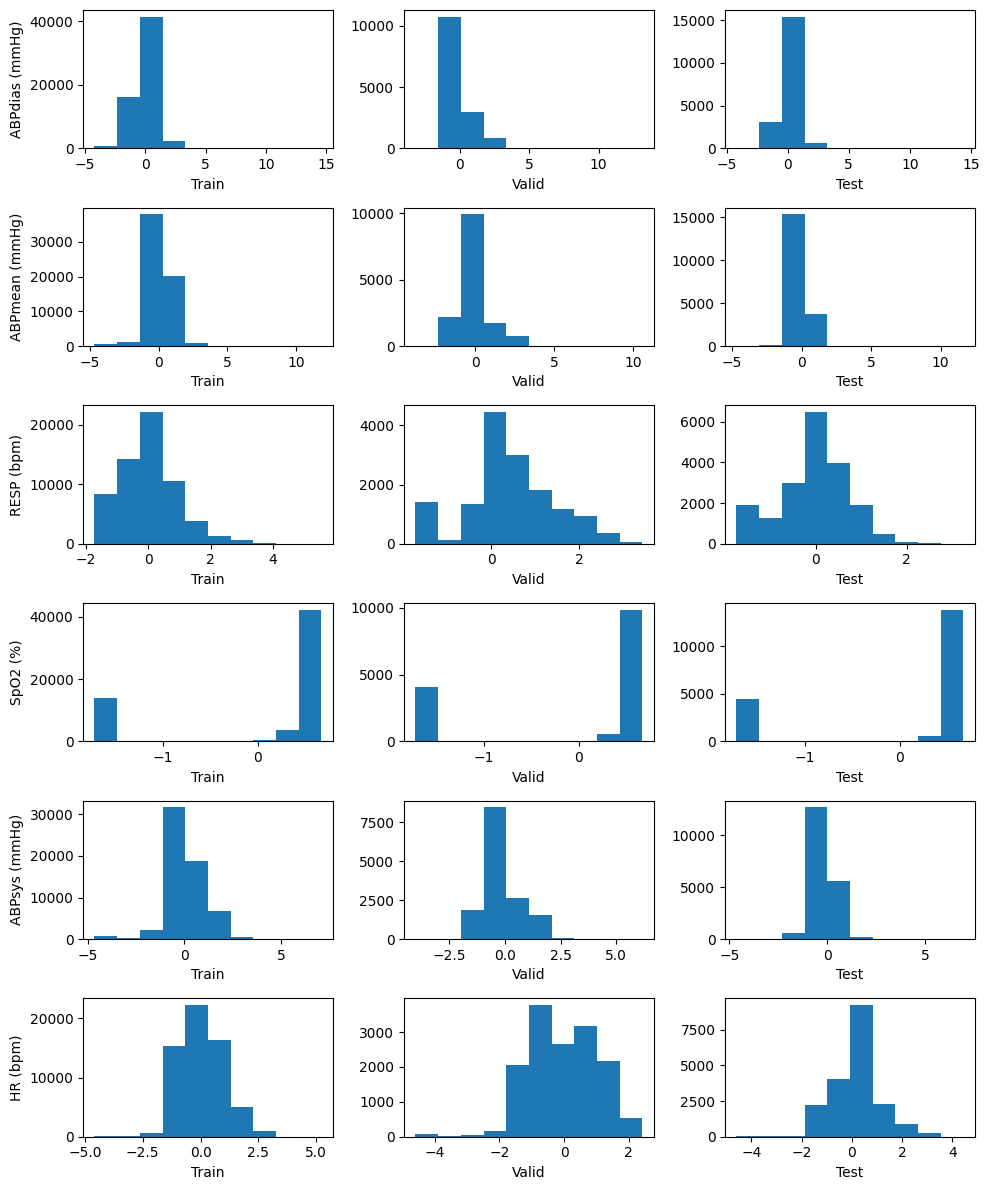

In [7]:
# Make train, validation and test sets
def train_valid_test_split(df, pred_cols):
    df_train, df_valid, df_test = df[df["train"]], df[df["valid"]], df[df["test"]]
    num_pred_cols = len(pred_cols)
    
    # Plot distribution of pred_col for each set
    fig, axes = plt.subplots(num_pred_cols, 3, figsize=(10, 2*num_pred_cols))
    for i, col in enumerate(pred_cols):
        axes[i, 0].hist(df_train[col])
        axes[i, 0].set_xlabel("Train")
        axes[i, 0].set_ylabel(col.split("_")[0])
        axes[i, 1].hist(df_valid[col])
        axes[i, 1].set_xlabel("Valid")
        axes[i, 2].hist(df_test[col])
        axes[i, 2].set_xlabel("Test")
    
    plt.tight_layout()

    return df_train, df_valid, df_test

df_train_1, df_valid_1, df_test_1 = train_valid_test_split(df, pred_cols=pred_cols_1)

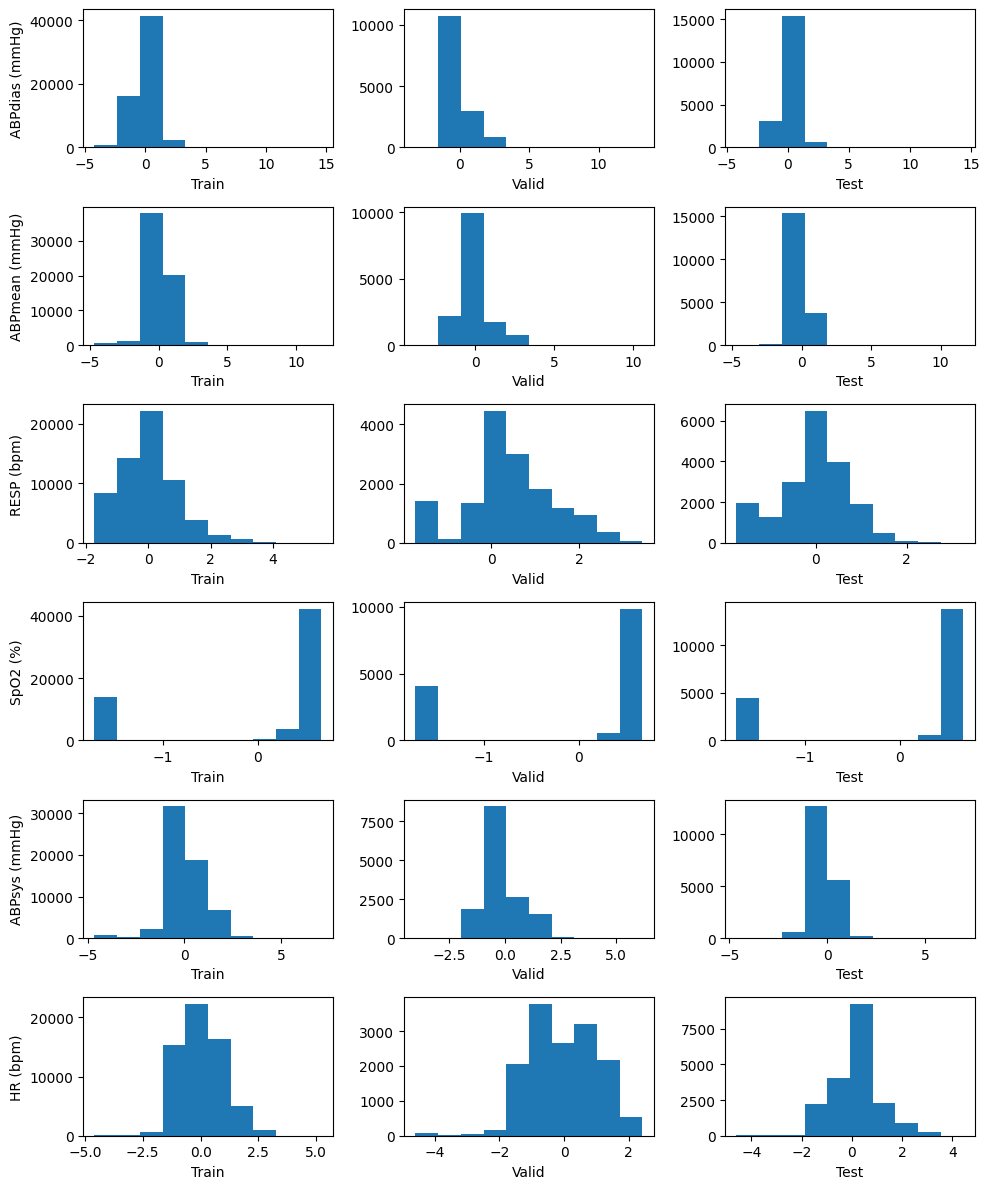

In [8]:
df_train_2, df_valid_2, df_test_2 = train_valid_test_split(df, pred_cols=pred_cols_2)

## Model Definition

In [21]:
def set_seed(seed):
    tf.config.experimental.enable_op_determinism()
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    tf.keras.utils.set_random_seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)

def display_history(history, show_acc=False):
    if show_acc:
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(6, 2.5))
        axes[0].plot(history.history['loss'])
        axes[0].plot(history.history['val_loss'])
        axes[0].set_title('Model Loss')
        axes[0].set_ylabel('Loss')
        axes[0].set_xlabel('Epoch')
        axes[0].legend(['Train', 'Val'], loc='upper left')
        axes[1].plot(history.history['accuracy'])
        axes[1].plot(history.history['val_accuracy'])
        axes[1].set_title('Model Accuracy')
        axes[1].set_ylabel('Accuracy')
        axes[1].set_xlabel('Epoch')
        axes[1].legend(['Train', 'Val'], loc='upper left')
        axes[2].plot(history.history['f1_score'])
        axes[2].plot(history.history['val_f1_score'])
        axes[2].set_title('Model F1 Score')
        axes[2].set_ylabel('F1 Score')
        axes[2].set_xlabel('Epoch')
        axes[2].legend(['Train', 'Val'], loc='upper left')
    else:
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(3, 2.5))
        axes.plot(history.history['loss'])
        axes.plot(history.history['val_loss'])
        axes.set_title('Model Loss')
        axes.set_ylabel('Loss')
        axes.set_xlabel('Epoch')
        axes.legend(['Train', 'Val'], loc='upper left')
    plt.tight_layout()
    plt.show()

class AE_Regressor:
    def __init__(self, width, predictors, output_features):
        from keras.layers import Dense
        self.predictors = predictors
        self.output_features = output_features
        self.num_predictors = len(self.predictors)
        self.num_outputs = len(self.output_features)
        self.width = width
        
        # Instantiate model layers
        self.inputs = tf.keras.Input(shape=(self.num_predictors,))
        self.encoder = Dense(
            self.width, activation=tf.keras.layers.LeakyReLU(alpha=0.3), 
            name="encoder", kernel_regularizer="l2")
        self.decoder = Dense(self.num_predictors, name="decoder")
        self.regressor = Dense(self.num_outputs, name="regressor")
    
    # Smote is external
    def train_regressor(
        self, train_X, train_y, val_X, val_y, batch_size, max_epochs, verbose, patience):
        from tensorflow.keras.callbacks import EarlyStopping
        # Define regressor
        pred = self.encoder(self.inputs)
        pred = self.regressor(pred)
        self.predictor = tf.keras.Model(inputs=self.inputs, outputs=pred, name="regression_model")
        # Train classifier
        self.predictor.compile(
            loss="mse",
            optimizer=tf.keras.optimizers.Adam()
        )
        es = EarlyStopping(
            monitor='val_loss', mode='min', verbose=1, patience=patience, restore_best_weights=True)
        self.predictor_history = self.predictor.fit(
            train_X, train_y, 
            epochs=max_epochs, 
            validation_data=(val_X, val_y),
            verbose=verbose,
            batch_size=batch_size,
            callbacks=[es],
        )
        print("- Regressor Training History")
        display_history(self.predictor_history)
        best_index = np.argmin(self.predictor_history.history['val_loss'])
        return (
            self.predictor_history.history['val_loss'][best_index], 
            best_index
        )
        
    def train_decoder(
        self, train_X, val_X, batch_size, max_epochs, verbose, patience):
        from tensorflow.keras.callbacks import EarlyStopping
        # Define AE
        self.encoder.trainable=False # Freeze weights
        x = self.encoder(self.inputs)
        x = self.decoder(x)
        self.ae = tf.keras.Model(inputs=self.inputs, outputs=x, name="ae_model")
        # Train AE
        self.ae.compile(
            loss="mse",
            optimizer=tf.keras.optimizers.Adam()
        )
        es = EarlyStopping(
            monitor='val_loss', mode='min', verbose=1, patience=patience,restore_best_weights=True)
        self.ae_history = self.ae.fit(
            train_X, train_X, 
            epochs=max_epochs, 
            validation_data=(val_X, val_X),
            verbose=verbose,
            batch_size=batch_size,
            callbacks=[es]
        )
        print("- Autoencoder Training History")
        display_history(self.ae_history)
        return min(self.ae_history.history['val_loss'])

    def predict(self, inputs, with_mae=False, weighted=False):
        
        with tf.GradientTape() as tape:
            inputs_tf = tf.convert_to_tensor(inputs)
            tape.watch(inputs_tf)
            # Encode
            encoder_output = self.encoder(inputs_tf)
            # Reconstruct
            decoder_output = self.decoder(encoder_output)
            # Get forecast result
            regressor_output = self.regressor(encoder_output)
            gradients = tape.gradient(regressor_output, inputs_tf)
        
        print(gradients.shape)
        
        # Calculate reconstruction error
        mae = tf.math.abs(decoder_output - inputs)
#         print(mae.shape)
        if weighted:
            print("Weighted")
            weights = tf.math.abs(gradients)
            weights = tf.nn.softmax(weights)
            mae = tf.math.multiply(mae, weights)
#             print(weights)
#             print(mae.shape)
            mae = tf.reduce_sum(mae, [-1])
        else:
#             print(mae.shape)
            mae = tf.reduce_mean(mae, [-1])
#         print(mae.shape)
        if with_mae:
            return regressor_output, mae
        else:
            return regressor_output
    
        
def save_model(model, name, fp_checkpoints, override=False):
    import pickle
    model_folder = os.path.join(fp_checkpoints, name)
    if os.path.exists(model_folder):
        print("Model checkpoint already exists!")
        if not override:
            return
    else:
        os.makedirs(model_folder)
    
    # Save Parameters
    parameters_to_save = dict(
        predictors = model.predictors,
        output_features = model.output_features,
        width = model.width
    )   
    parameter_filename = os.path.join(fp_checkpoints, name, "parameters.pickle")
    with open(parameter_filename, 'wb') as handle:
        pickle.dump(parameters_to_save, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    # Save Model
    inputs = model.inputs
    encoder_output = model.encoder(inputs)
    decoder_output = model.decoder(encoder_output)
    regressor_output = model.regressor(encoder_output)
    model = tf.keras.Model(inputs, [regressor_output, decoder_output])
    model_filename = os.path.join(fp_checkpoints, name, "model.h5")
    model.save(model_filename)
    print("Model saved!")

def load_model(name, fp_checkpoints): 
    import pickle
    model_folder = os.path.join(fp_checkpoints, name)
    parameter_filename = os.path.join(fp_checkpoints, name, "parameters.pickle")
    model_filename = os.path.join(fp_checkpoints, name, "model.h5")
    
    if not os.path.exists(model_folder):
        print("model checkpoint does not exist!")
        return
    model = tf.keras.models.load_model(model_filename)
    with open(parameter_filename, 'rb') as handle:
        parameters = pickle.load(handle)
    
    ae_regressor = AE_Regressor(
        parameters["width"], parameters["predictors"], parameters["output_features"])
    ae_regressor.encoder = model.get_layer("encoder")
    ae_regressor.decoder = model.get_layer("decoder")
    ae_regressor.regressor = model.get_layer("regressor")
    
    return ae_regressor

def model_tuning(
    width_list, predictors, pred_cols, train_df, valid_df, seed,
    batch_size=128, max_epochs=5000, verbose=1, patience=10):
    train_X, train_y = (
        train_df[predictors].values.astype('float32'), train_df[pred_cols].values.astype('float32'))
    valid_X, valid_y = (
        valid_df[predictors].values.astype('float32'), valid_df[pred_cols].values.astype('float32'))
    loss_list = []
    epoch_list = []
    time_spent_list = []
    for width in tqdm(width_list):
        set_seed(seed)
        regressor = AE_Regressor(width, predictors, pred_cols)
        start = time.time()
        val_loss, best_epoch = regressor.train_regressor(
            train_X, train_y, valid_X, valid_y, 
            batch_size, max_epochs, verbose, patience)
        loss_list.append(val_loss)
        epoch_list.append(best_epoch)
        time_spent_list.append(time.time()-start)
    tuning_df = pd.DataFrame(
        {"width": width_list, "loss": loss_list, 
         "epochs": epoch_list,"time/s": time_spent_list})
    best_width_idx = tuning_df['loss'].idxmin()
    best_width = tuning_df['width'].tolist()[best_width_idx]
    return tuning_df, best_width

def model_training(
    width, predictors, pred_cols, train_df, valid_df, seed,
    batch_size=128, max_epochs=5000, verbose=1, patience=10):
    
    from tqdm import tqdm
    import time
    set_seed(seed)
    
    # Get data
    train_X, train_y = (
        train_df[predictors].values.astype('float32'), train_df[pred_cols].values.astype('float32'))
    valid_X, valid_y = (
        valid_df[predictors].values.astype('float32'), valid_df[pred_cols].values.astype('float32'))
    
    # Train Regressor
    ae_regressor = AE_Regressor(width, predictors, pred_cols)
    
    start = time.time()
    # Train classifier
    valid_loss_regressor, best_epoch = ae_regressor.train_regressor(
        train_X, train_y, valid_X, valid_y, 
        batch_size, max_epochs, verbose, patience)
    
    # Train decoder
    valid_loss_ae = ae_regressor.train_decoder(
        train_X, valid_X, batch_size, max_epochs, verbose, patience)
    
    print(f"Training took {time.time()-start}s.")
    return ae_regressor

## Model Tuning

### Predict T+1

  0%|                                                     | 0/6 [00:00<?, ?it/s]

Epoch 1/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.2543 - val_loss: 0.8770
Epoch 2/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.7017 - val_loss: 0.6500
Epoch 3/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.5651 - val_loss: 0.5417
Epoch 4/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4753 - val_loss: 0.4609
Epoch 5/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4064 - val_loss: 0.3980
Epoch 6/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3523 - val_loss: 0.3491
Epoch 7/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3096 - val_loss: 0.3099
Epoch 8/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2756 - val_loss: 0.2790
Epoch 9/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2485 - val_loss: 0.2536
Epoch 10/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2262 - val_lo

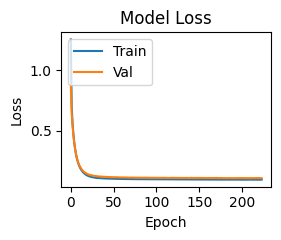

 17%|███████▌                                     | 1/6 [00:12<01:00, 12.15s/it]

Epoch 1/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.0987 - val_loss: 0.8222
Epoch 2/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.6973 - val_loss: 0.6142
Epoch 3/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.5284 - val_loss: 0.4760
Epoch 4/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4123 - val_loss: 0.3787
Epoch 5/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3303 - val_loss: 0.3101
Epoch 6/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2721 - val_loss: 0.2611
Epoch 7/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2304 - val_loss: 0.2262
Epoch 8/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2003 - val_loss: 0.2019
Epoch 9/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1787 - val_loss: 0.1822
Epoch 10/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1619 - val_lo

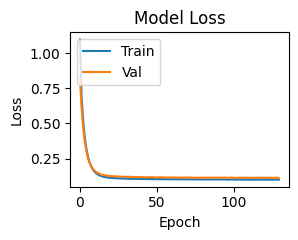

 33%|███████████████                              | 2/6 [00:19<00:37,  9.25s/it]

Epoch 1/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.1623 - val_loss: 0.8737
Epoch 2/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.7181 - val_loss: 0.6131
Epoch 3/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.5144 - val_loss: 0.4509
Epoch 4/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3839 - val_loss: 0.3469
Epoch 5/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2986 - val_loss: 0.2783
Epoch 6/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2418 - val_loss: 0.2323
Epoch 7/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2032 - val_loss: 0.1999
Epoch 8/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1765 - val_loss: 0.1794
Epoch 9/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1582 - val_loss: 0.1629
Epoch 10/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1442 - val_lo

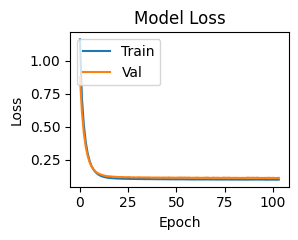

 50%|██████████████████████▌                      | 3/6 [00:25<00:23,  7.74s/it]

Epoch 1/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.1256 - val_loss: 0.8106
Epoch 2/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.6333 - val_loss: 0.5064
Epoch 3/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4088 - val_loss: 0.3464
Epoch 4/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2871 - val_loss: 0.2582
Epoch 5/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2180 - val_loss: 0.2065
Epoch 6/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1770 - val_loss: 0.1747
Epoch 7/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1520 - val_loss: 0.1549
Epoch 8/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1364 - val_loss: 0.1463
Epoch 9/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1272 - val_loss: 0.1371
Epoch 10/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1204 - val_lo

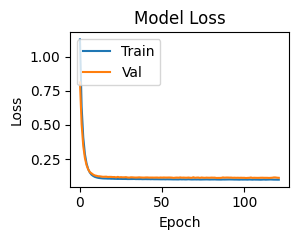

 67%|██████████████████████████████               | 4/6 [00:32<00:14,  7.39s/it]

Epoch 1/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.0544 - val_loss: 0.6957
Epoch 2/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.5064 - val_loss: 0.3803
Epoch 3/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2960 - val_loss: 0.2486
Epoch 4/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2034 - val_loss: 0.1884
Epoch 5/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1585 - val_loss: 0.1572
Epoch 6/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1358 - val_loss: 0.1410
Epoch 7/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1240 - val_loss: 0.1324
Epoch 8/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1175 - val_loss: 0.1333
Epoch 9/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1151 - val_loss: 0.1271
Epoch 10/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1127 - val_lo

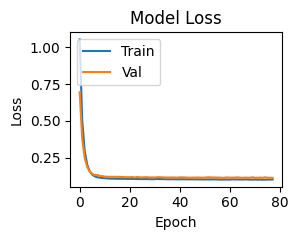

 83%|█████████████████████████████████████▌       | 5/6 [00:36<00:06,  6.45s/it]

Epoch 1/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.0096 - val_loss: 0.6224
Epoch 2/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4403 - val_loss: 0.3257
Epoch 3/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2525 - val_loss: 0.2153
Epoch 4/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1768 - val_loss: 0.1678
Epoch 5/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1422 - val_loss: 0.1446
Epoch 6/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1262 - val_loss: 0.1338
Epoch 7/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1185 - val_loss: 0.1287
Epoch 8/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1141 - val_loss: 0.1294
Epoch 9/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1132 - val_loss: 0.1258
Epoch 10/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1110 - val_lo

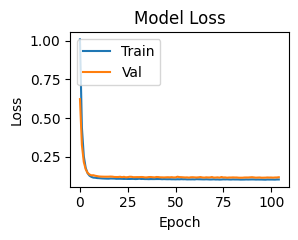

100%|█████████████████████████████████████████████| 6/6 [00:43<00:00,  7.24s/it]


In [15]:
tuning_df_1, best_width_1 = model_tuning(
    width_list=[64, 128, 256, 512, 1024, 1536], predictors=predictors, pred_cols=pred_cols_1, 
    train_df=df_train_1, valid_df=df_valid_1, seed=2023,
    batch_size=2048, max_epochs=10000, verbose=1, patience=20
)

In [16]:
tuning_df_1

width      loss  epochs     time/s
0     64  0.109625     203  12.140110
1    128  0.111658     109   7.221895
2    256  0.112265      83   5.939962
3    512  0.111868     101   6.847137
4   1024  0.113619      57   4.763746
5   1536  0.113255      84   6.489682

### Predict T+2

  0%|                                                     | 0/6 [00:00<?, ?it/s]

Epoch 1/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.2704 - val_loss: 0.9024
Epoch 2/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.7310 - val_loss: 0.6832
Epoch 3/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.5975 - val_loss: 0.5770
Epoch 4/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.5090 - val_loss: 0.4973
Epoch 5/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4412 - val_loss: 0.4359
Epoch 6/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3879 - val_loss: 0.3875
Epoch 7/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3459 - val_loss: 0.3497
Epoch 8/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3124 - val_loss: 0.3190
Epoch 9/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2856 - val_loss: 0.2937
Epoch 10/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2638 - val_lo

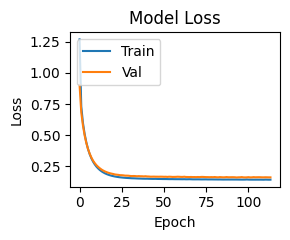

 17%|███████▌                                     | 1/6 [00:06<00:32,  6.51s/it]

Epoch 1/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.1212 - val_loss: 0.8532
Epoch 2/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.7296 - val_loss: 0.6495
Epoch 3/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.5622 - val_loss: 0.5121
Epoch 4/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4470 - val_loss: 0.4160
Epoch 5/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3659 - val_loss: 0.3485
Epoch 6/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3082 - val_loss: 0.3002
Epoch 7/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2672 - val_loss: 0.2667
Epoch 8/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2378 - val_loss: 0.2419
Epoch 9/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2163 - val_loss: 0.2235
Epoch 10/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2005 - val_lo

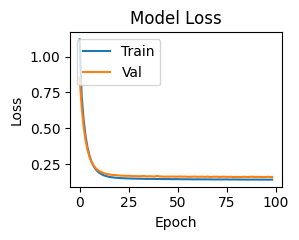

 33%|███████████████                              | 2/6 [00:12<00:24,  6.01s/it]

Epoch 1/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.1845 - val_loss: 0.9059
Epoch 2/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.7500 - val_loss: 0.6489
Epoch 3/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.5481 - val_loss: 0.4885
Epoch 4/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4187 - val_loss: 0.3851
Epoch 5/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3344 - val_loss: 0.3177
Epoch 6/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2782 - val_loss: 0.2723
Epoch 7/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2403 - val_loss: 0.2410
Epoch 8/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2143 - val_loss: 0.2196
Epoch 9/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1960 - val_loss: 0.2045
Epoch 10/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1831 - val_lo

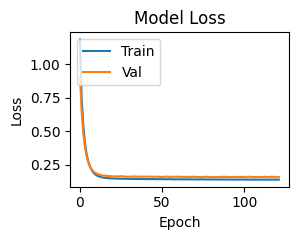

 50%|██████████████████████▌                      | 3/6 [00:19<00:19,  6.50s/it]

Epoch 1/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.1485 - val_loss: 0.8445
Epoch 2/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.6652 - val_loss: 0.5425
Epoch 3/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4427 - val_loss: 0.3842
Epoch 4/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3224 - val_loss: 0.2971
Epoch 5/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2548 - val_loss: 0.2473
Epoch 6/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2147 - val_loss: 0.2159
Epoch 7/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1905 - val_loss: 0.1970
Epoch 8/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1756 - val_loss: 0.1864
Epoch 9/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1667 - val_loss: 0.1804
Epoch 10/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1606 - val_lo

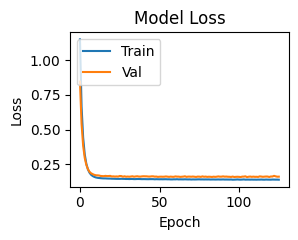

 67%|██████████████████████████████               | 4/6 [00:26<00:13,  6.75s/it]

Epoch 1/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.0808 - val_loss: 0.7288
Epoch 2/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.5396 - val_loss: 0.4175
Epoch 3/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3313 - val_loss: 0.2882
Epoch 4/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2403 - val_loss: 0.2291
Epoch 5/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1972 - val_loss: 0.1991
Epoch 6/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1752 - val_loss: 0.1845
Epoch 7/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1641 - val_loss: 0.1760
Epoch 8/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1581 - val_loss: 0.1748
Epoch 9/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1550 - val_loss: 0.1709
Epoch 10/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1537 - val_lo

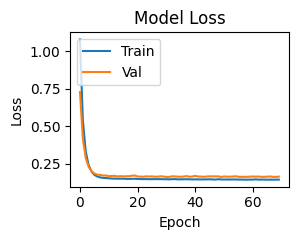

 83%|█████████████████████████████████████▌       | 5/6 [00:30<00:05,  5.90s/it]

Epoch 1/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.0367 - val_loss: 0.6565
Epoch 2/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4737 - val_loss: 0.3634
Epoch 3/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2880 - val_loss: 0.2559
Epoch 4/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2141 - val_loss: 0.2092
Epoch 5/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1813 - val_loss: 0.1866
Epoch 6/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1658 - val_loss: 0.1786
Epoch 7/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1589 - val_loss: 0.1723
Epoch 8/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1552 - val_loss: 0.1726
Epoch 9/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1533 - val_loss: 0.1698
Epoch 10/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1520 - val_lo

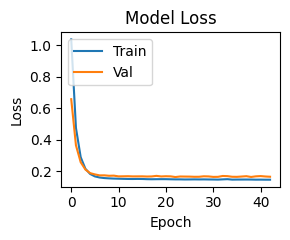

100%|█████████████████████████████████████████████| 6/6 [00:33<00:00,  5.64s/it]


In [18]:
tuning_df_2, best_width_2 = model_tuning(
    width_list=[64, 128, 256, 512, 1024, 1536], predictors=predictors, pred_cols=pred_cols_2, 
    train_df=df_train_2, valid_df=df_valid_2, seed=2023,
    batch_size=2048, max_epochs=10000, verbose=1, patience=20
)

In [19]:
tuning_df_2

width      loss  epochs    time/s
0     64  0.158815      93  6.499089
1    128  0.159001      78  5.661440
2    256  0.158590     101  7.083744
3    512  0.159159     105  7.121256
4   1024  0.161093      49  4.387775
5   1536  0.161838      22  3.033055

## Model Training

### Predict T+1

Epoch 1/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.2543 - val_loss: 0.8770
Epoch 2/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.7017 - val_loss: 0.6500
Epoch 3/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.5651 - val_loss: 0.5417
Epoch 4/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4753 - val_loss: 0.4609
Epoch 5/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4064 - val_loss: 0.3980
Epoch 6/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3523 - val_loss: 0.3491
Epoch 7/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3096 - val_loss: 0.3099
Epoch 8/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2756 - val_loss: 0.2790
Epoch 9/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2485 - val_loss: 0.2536
Epoch 10/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2262 - val_lo

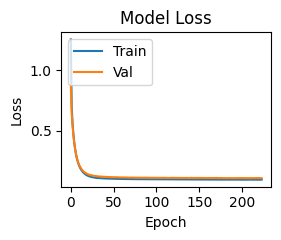

Epoch 1/10000
30/30 [==============================] - 0s 4ms/step - loss: 0.5146 - val_loss: 0.5280
Epoch 2/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4486 - val_loss: 0.4799
Epoch 3/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4030 - val_loss: 0.4381
Epoch 4/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3638 - val_loss: 0.4001
Epoch 5/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3293 - val_loss: 0.3649
Epoch 6/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2986 - val_loss: 0.3336
Epoch 7/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2716 - val_loss: 0.3047
Epoch 8/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2477 - val_loss: 0.2792
Epoch 9/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2267 - val_loss: 0.2563
Epoch 10/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2081 - val_lo

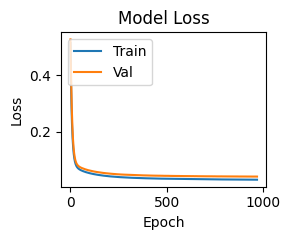

Training took 61.78893494606018s.


In [22]:
ae_regressor_1 = model_training(
    width=best_width_1, predictors=predictors, pred_cols=pred_cols_1, 
    train_df=df_train_1, valid_df = df_valid_1, seed=2023,
    batch_size=2048, max_epochs=10000, verbose=1, patience=20
)

In [23]:
save_model(model=ae_regressor_1, name="ae_model_1", fp_checkpoints=fp_model_checkpoint_folder, override=False)

Model saved!


/home/lirong/anaconda3/envs/icu/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
ae_regressor_1 = load_model(name="ae_model_1", fp_checkpoints=fp_model_checkpoint_folder)

### Predict T+2

Epoch 1/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.1845 - val_loss: 0.9059
Epoch 2/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.7500 - val_loss: 0.6489
Epoch 3/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.5481 - val_loss: 0.4885
Epoch 4/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4187 - val_loss: 0.3851
Epoch 5/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3344 - val_loss: 0.3177
Epoch 6/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2782 - val_loss: 0.2723
Epoch 7/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2403 - val_loss: 0.2410
Epoch 8/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2143 - val_loss: 0.2196
Epoch 9/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1960 - val_loss: 0.2045
Epoch 10/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1831 - val_lo

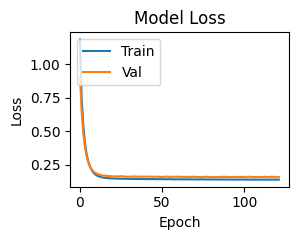

Epoch 1/10000
30/30 [==============================] - 0s 4ms/step - loss: 0.4615 - val_loss: 0.4484
Epoch 2/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3594 - val_loss: 0.3579
Epoch 3/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2835 - val_loss: 0.2881
Epoch 4/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2266 - val_loss: 0.2351
Epoch 5/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1844 - val_loss: 0.1948
Epoch 6/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1533 - val_loss: 0.1653
Epoch 7/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1308 - val_loss: 0.1426
Epoch 8/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1144 - val_loss: 0.1262
Epoch 9/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1025 - val_loss: 0.1139
Epoch 10/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.0939 - val_lo

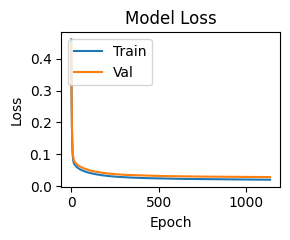

Training took 65.04190874099731s.


In [25]:
ae_regressor_2 = model_training(
    width=best_width_2, predictors=predictors, pred_cols=pred_cols_2, 
    train_df=df_train_2, valid_df = df_valid_2, seed=2023,
    batch_size=2048, max_epochs=10000, verbose=1, patience=20
)

In [26]:
save_model(model=ae_regressor_2, name="ae_model_2", fp_checkpoints=fp_model_checkpoint_folder, override=False)

Model saved!


/home/lirong/anaconda3/envs/icu/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
ae_regressor_2 = load_model(name="ae_model_2", fp_checkpoints=fp_model_checkpoint_folder)

## Evaluation

### Requested Plots

#### Plot 1: "Variable value over time vs predicted value over time (two lines, red is ground truth, green is prediction – do this for all six)"


#### Plot 2: Prediction error vs uncertainty measure for predicting t+1


#### Plot 3: Ground truth, prediction, and prediction +/- uncertainty measure (so 4 lines in total; we want to see that the ground truth does not go beyond the prediction +/- boundaries; the tricky thing is we don’t have way to convert uncertainty estimation back to variable value delta – so, think about something)

#### Plot 4: Do the same exercise for predicting t+2 and t+3. Instead of using t+1 prediction to predict t+2, maybe just build a model to predict t+2 directly. The prediction performance should be worse, but this is not reflected in the current approach to uncertainty measure. I thought about the following:


### Generic Performance Metrics

(19215, 60)
(19215, 60)
(19215, 60)
(19215,)
tf.Tensor([0.04584639 0.07536902 0.11236446 ... 0.2859191  0.30851015 0.31543595], shape=(19215,), dtype=float32)
MSE: 0.13248022
MAE-SE Correlation: 0.8184789658733309


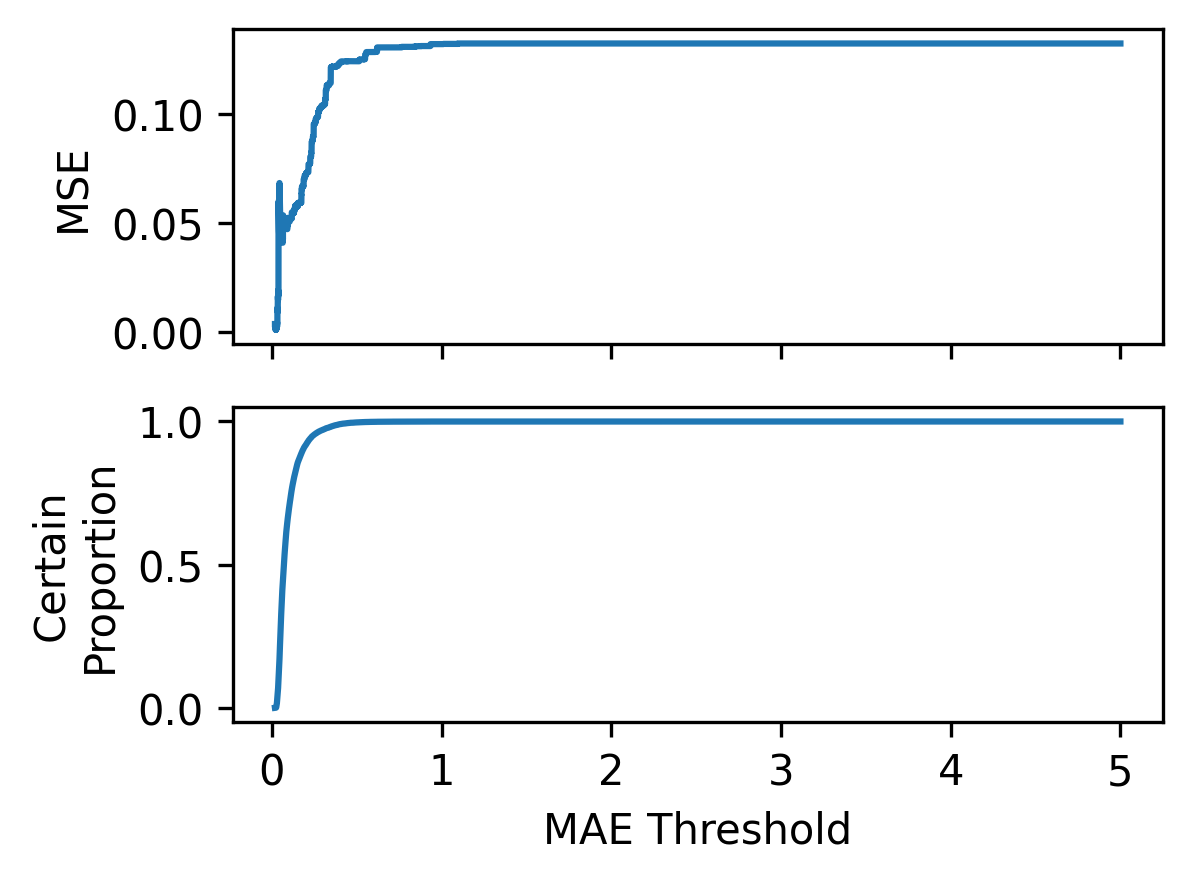

In [156]:
def model_evaluation(ae_regressor, df_test, pred_col, predictors, weighted=False, step=0.0001, start=0, end=5):
    test_X, test_y = (
        df_test[predictors].values.astype('float32'), df_test[pred_col].values.astype('float32'))
    test_y_pred, mae = ae_regressor.predict(inputs=test_X, with_mae=True, weighted=weighted)
    print(mae)
    mae = mae.numpy()
    test_y_pred = test_y_pred.numpy().flatten()
    
    # MSE
    se = (test_y-test_y_pred)**2
    mse = tf.keras.losses.MeanSquaredError()(test_y, test_y_pred).numpy()
    print("MSE:", mse)
    
    # Correlation
    from scipy.stats import pearsonr
    corr, p_value = pearsonr(test_y, test_y_pred)
    print("MAE-SE Correlation:", corr)
    
    # Threshold plot
    generate_threshold_graph(se, mae, start=start, end=end, step=step)
    

#     plt.scatter(mae, se)
    
def generate_threshold_graph(se, mae, start, end, step):
    mse_list = []
    threshold_list = []
    num_conf_list = []
    cur = start
    while cur <= end:
        confident = mae <= cur
        num_conf = np.sum(confident)
        if num_conf == 0:
            cur += step
            continue
        cur_mse = np.mean(se[confident])
        threshold_list.append(cur)
        mse_list.append(cur_mse)
        num_conf_list.append(num_conf)
        cur += step
    prop_list = np.array(num_conf_list)/len(se)
    fig, axes = plt.subplots(2, 1, figsize=(4, 3), sharex=True, dpi=300)
    axes[0].plot(threshold_list, mse_list)
    axes[0].set_ylabel("MSE")
    
    axes[1].plot(threshold_list, prop_list)
    axes[1].set_xlabel("MAE Threshold")
    axes[1].set_ylabel("Certain\nProportion")
    
model_evaluation(ae_regressor, df_test, pred_col, predictors)

### Analysis With XAI

In [55]:
def compute_gradients(ae_regressor, df_test, predictors, pred_col):
    test_X, test_y = (
        df_test[predictors].values.astype('float32'), df_test[pred_col].values.astype('float32'))
    test_X, test_y = tf.convert_to_tensor(test_X), tf.convert_to_tensor(test_y)
    with tf.GradientTape() as tape:
        tape.watch(test_X)
        test_y_pred, mae = ae_regressor.predict(test_X, with_mae=True)
        gradients = tape.gradient(test_y_pred, test_X)
    colnames = [pred+"_grad" for pred in predictors]
    grad_df = pd.DataFrame(gradients, columns=colnames)
    grad_df[predictors] = df_test[predictors].values
    grad_df["target"] = test_y
    grad_df["target_pred"] = test_y_pred
    grad_df["mae"] = mae
    return grad_df
gradients_test = compute_gradients(ae_regressor, df_test, predictors, pred_col)
gradients_test

ABPdias (mmHg)_mean Min0_grad  ABPsys (mmHg)_mean Min0_grad  \
0                          -0.054785                     -0.036015   
1                          -0.059974                     -0.038781   
2                          -0.054782                     -0.036037   
3                          -0.054782                     -0.036037   
4                          -0.053794                     -0.034016   
...                              ...                           ...   
19210                      -0.052379                     -0.024668   
19211                      -0.055537                     -0.028397   
19212                      -0.055479                     -0.036466   
19213                      -0.054546                     -0.026397   
19214                      -0.054441                     -0.028257   

       RESP (bpm)_mean Min0_grad  SpO2 (%)_mean Min0_grad  \
0                      -0.001262                 0.010831   
1                       0.005478                 0.004658   
2                      -0.000889                 0.010864   
3                      -0.000889                 0.010864   
4                      -0.003455                 0.011595   
...                          ...                      ...   
19210                   0.014178                -0.002559   
19211                   0.026547                -0.001352   
19212                   0.019446                 0.001794   
19213                   0.024354                -0.000588   
19214                   0.022792                -0.000221   

       HR (bpm)_mean Min0_grad  ABPmean (mmHg)_mean Min0_grad  \
0                    -0.015607                       0.100226   
1                    -0.007621                       0.093250   
2                    -0.015694                       0.100036   
3                    -0.015694                       0.100036   
4                    -0.017307                       0.101205   
...                        ...                            ...   
19210                 0.018080                       0.091778   
19211                 0.016951                       0.081075   
19212                 0.009834                       0.082673   
19213                 0.015252                       0.082054   
19214                 0.013352                       0.082518   

       ABPdias (mmHg)_std Min0_grad  ABPsys (mmHg)_std Min0_grad  \
0                         -0.020721                    -0.017198   
1                         -0.018249                    -0.016001   
2                         -0.020474                    -0.017119   
3                         -0.020474                    -0.017119   
4                         -0.020122                    -0.016936   
...                             ...                          ...   
19210                     -0.013139                    -0.014034   
19211                      0.005086                    -0.002703   
19212                      0.003714                    -0.002511   
19213                      0.005686                    -0.002440   
19214                      0.004583                    -0.002976   

       RESP (bpm)_std Min0_grad  SpO2 (%)_std Min0_grad  ...  \
0                     -0.012181               -0.010587  ...   
1                     -0.008596               -0.008815  ...   
2                     -0.012136               -0.010483  ...   
3                     -0.012136               -0.010483  ...   
4                     -0.012708               -0.010641  ...   
...                         ...                     ...  ...   
19210                  0.003137               -0.007672  ...   
19211                  0.001889               -0.002472  ...   
19212                  0.003639               -0.002704  ...   
19213                  0.001361               -0.002527  ...   
19214                  0.001576               -0.002655  ...   

       ABPmean (mmHg)_mean Min4  ABPdias (mmHg)_std Min4  \
0     

In [56]:
def generate_direction_labels(gradients_df, pred_col="ABPmean (mmHg)_mean", last_min=" Min4"):
    gradients_df = gradients_df.copy()
    prev_val_col = pred_col + last_min
    gradients_df["target_increased"] = gradients_df["target"] > gradients_df[prev_val_col] 
    gradients_df["target_pred_increased"] = gradients_df["target_pred"] > gradients_df[prev_val_col] 
    return gradients_df

gradients_test = generate_direction_labels(gradients_test)
gradients_test

ABPdias (mmHg)_mean Min0_grad  ABPsys (mmHg)_mean Min0_grad  \
0                          -0.054785                     -0.036015   
1                          -0.059974                     -0.038781   
2                          -0.054782                     -0.036037   
3                          -0.054782                     -0.036037   
4                          -0.053794                     -0.034016   
...                              ...                           ...   
19210                      -0.052379                     -0.024668   
19211                      -0.055537                     -0.028397   
19212                      -0.055479                     -0.036466   
19213                      -0.054546                     -0.026397   
19214                      -0.054441                     -0.028257   

       RESP (bpm)_mean Min0_grad  SpO2 (%)_mean Min0_grad  \
0                      -0.001262                 0.010831   
1                       0.005478                 0.004658   
2                      -0.000889                 0.010864   
3                      -0.000889                 0.010864   
4                      -0.003455                 0.011595   
...                          ...                      ...   
19210                   0.014178                -0.002559   
19211                   0.026547                -0.001352   
19212                   0.019446                 0.001794   
19213                   0.024354                -0.000588   
19214                   0.022792                -0.000221   

       HR (bpm)_mean Min0_grad  ABPmean (mmHg)_mean Min0_grad  \
0                    -0.015607                       0.100226   
1                    -0.007621                       0.093250   
2                    -0.015694                       0.100036   
3                    -0.015694                       0.100036   
4                    -0.017307                       0.101205   
...                        ...                            ...   
19210                 0.018080                       0.091778   
19211                 0.016951                       0.081075   
19212                 0.009834                       0.082673   
19213                 0.015252                       0.082054   
19214                 0.013352                       0.082518   

       ABPdias (mmHg)_std Min0_grad  ABPsys (mmHg)_std Min0_grad  \
0                         -0.020721                    -0.017198   
1                         -0.018249                    -0.016001   
2                         -0.020474                    -0.017119   
3                         -0.020474                    -0.017119   
4                         -0.020122                    -0.016936   
...                             ...                          ...   
19210                     -0.013139                    -0.014034   
19211                      0.005086                    -0.002703   
19212                      0.003714                    -0.002511   
19213                      0.005686                    -0.002440   
19214                      0.004583                    -0.002976   

       RESP (bpm)_std Min0_grad  SpO2 (%)_std Min0_grad  ...  \
0                     -0.012181               -0.010587  ...   
1                     -0.008596               -0.008815  ...   
2                     -0.012136               -0.010483  ...   
3                     -0.012136               -0.010483  ...   
4                     -0.012708               -0.010641  ...   
...                         ...                     ...  ...   
19210                  0.003137               -0.007672  ...   
19211                  0.001889               -0.002472  ...   
19212                  0.003639               -0.002704  ...   
19213                  0.001361               -0.002527  ...   
19214                  0.001576               -0.002655  ...   

       ABPsys (mmHg)_std Min4  RESP (bpm)_std Min4  SpO2 (%)_std M

In [57]:
gradients_test[["ABPmean (mmHg)_mean Min4", "target", "target_pred", "target_increased", "target_pred_increased"]]

ABPmean (mmHg)_mean Min4    target  target_pred  target_increased  \
0                      0.033384 -0.049935     0.050703             False   
1                     -0.049935  0.020737    -0.050380              True   
2                      0.020737  0.031896     0.012281              True   
3                      0.031896  0.047518     0.011211              True   
4                      0.047518  0.055701     0.052544              True   
...                         ...       ...          ...               ...   
19210                 -4.304388 -4.680065    -3.932964             False   
19211                 -4.680065 -3.950284    -4.394552              True   
19212                 -3.950284 -3.867709    -3.762338              True   
19213                 -3.867709 -3.809684    -3.700814              True   
19214                 -3.809684 -3.867709    -3.657071             False   

       target_pred_increased  
0                       True  
1                      False  
2                      False  
3                      False  
4                       True  
...                      ...  
19210                   True  
19211                   True  
19212                   True  
19213                   True  
19214                   True  

[19215 rows x 5 columns]

In [58]:
(gradients_test["target_increased"] == gradients_test["target_pred_increased"]).sum()/len(gradients_test)

0.5327608639084049

### Can we trust explanations without uncertainty?

(4804, 125)


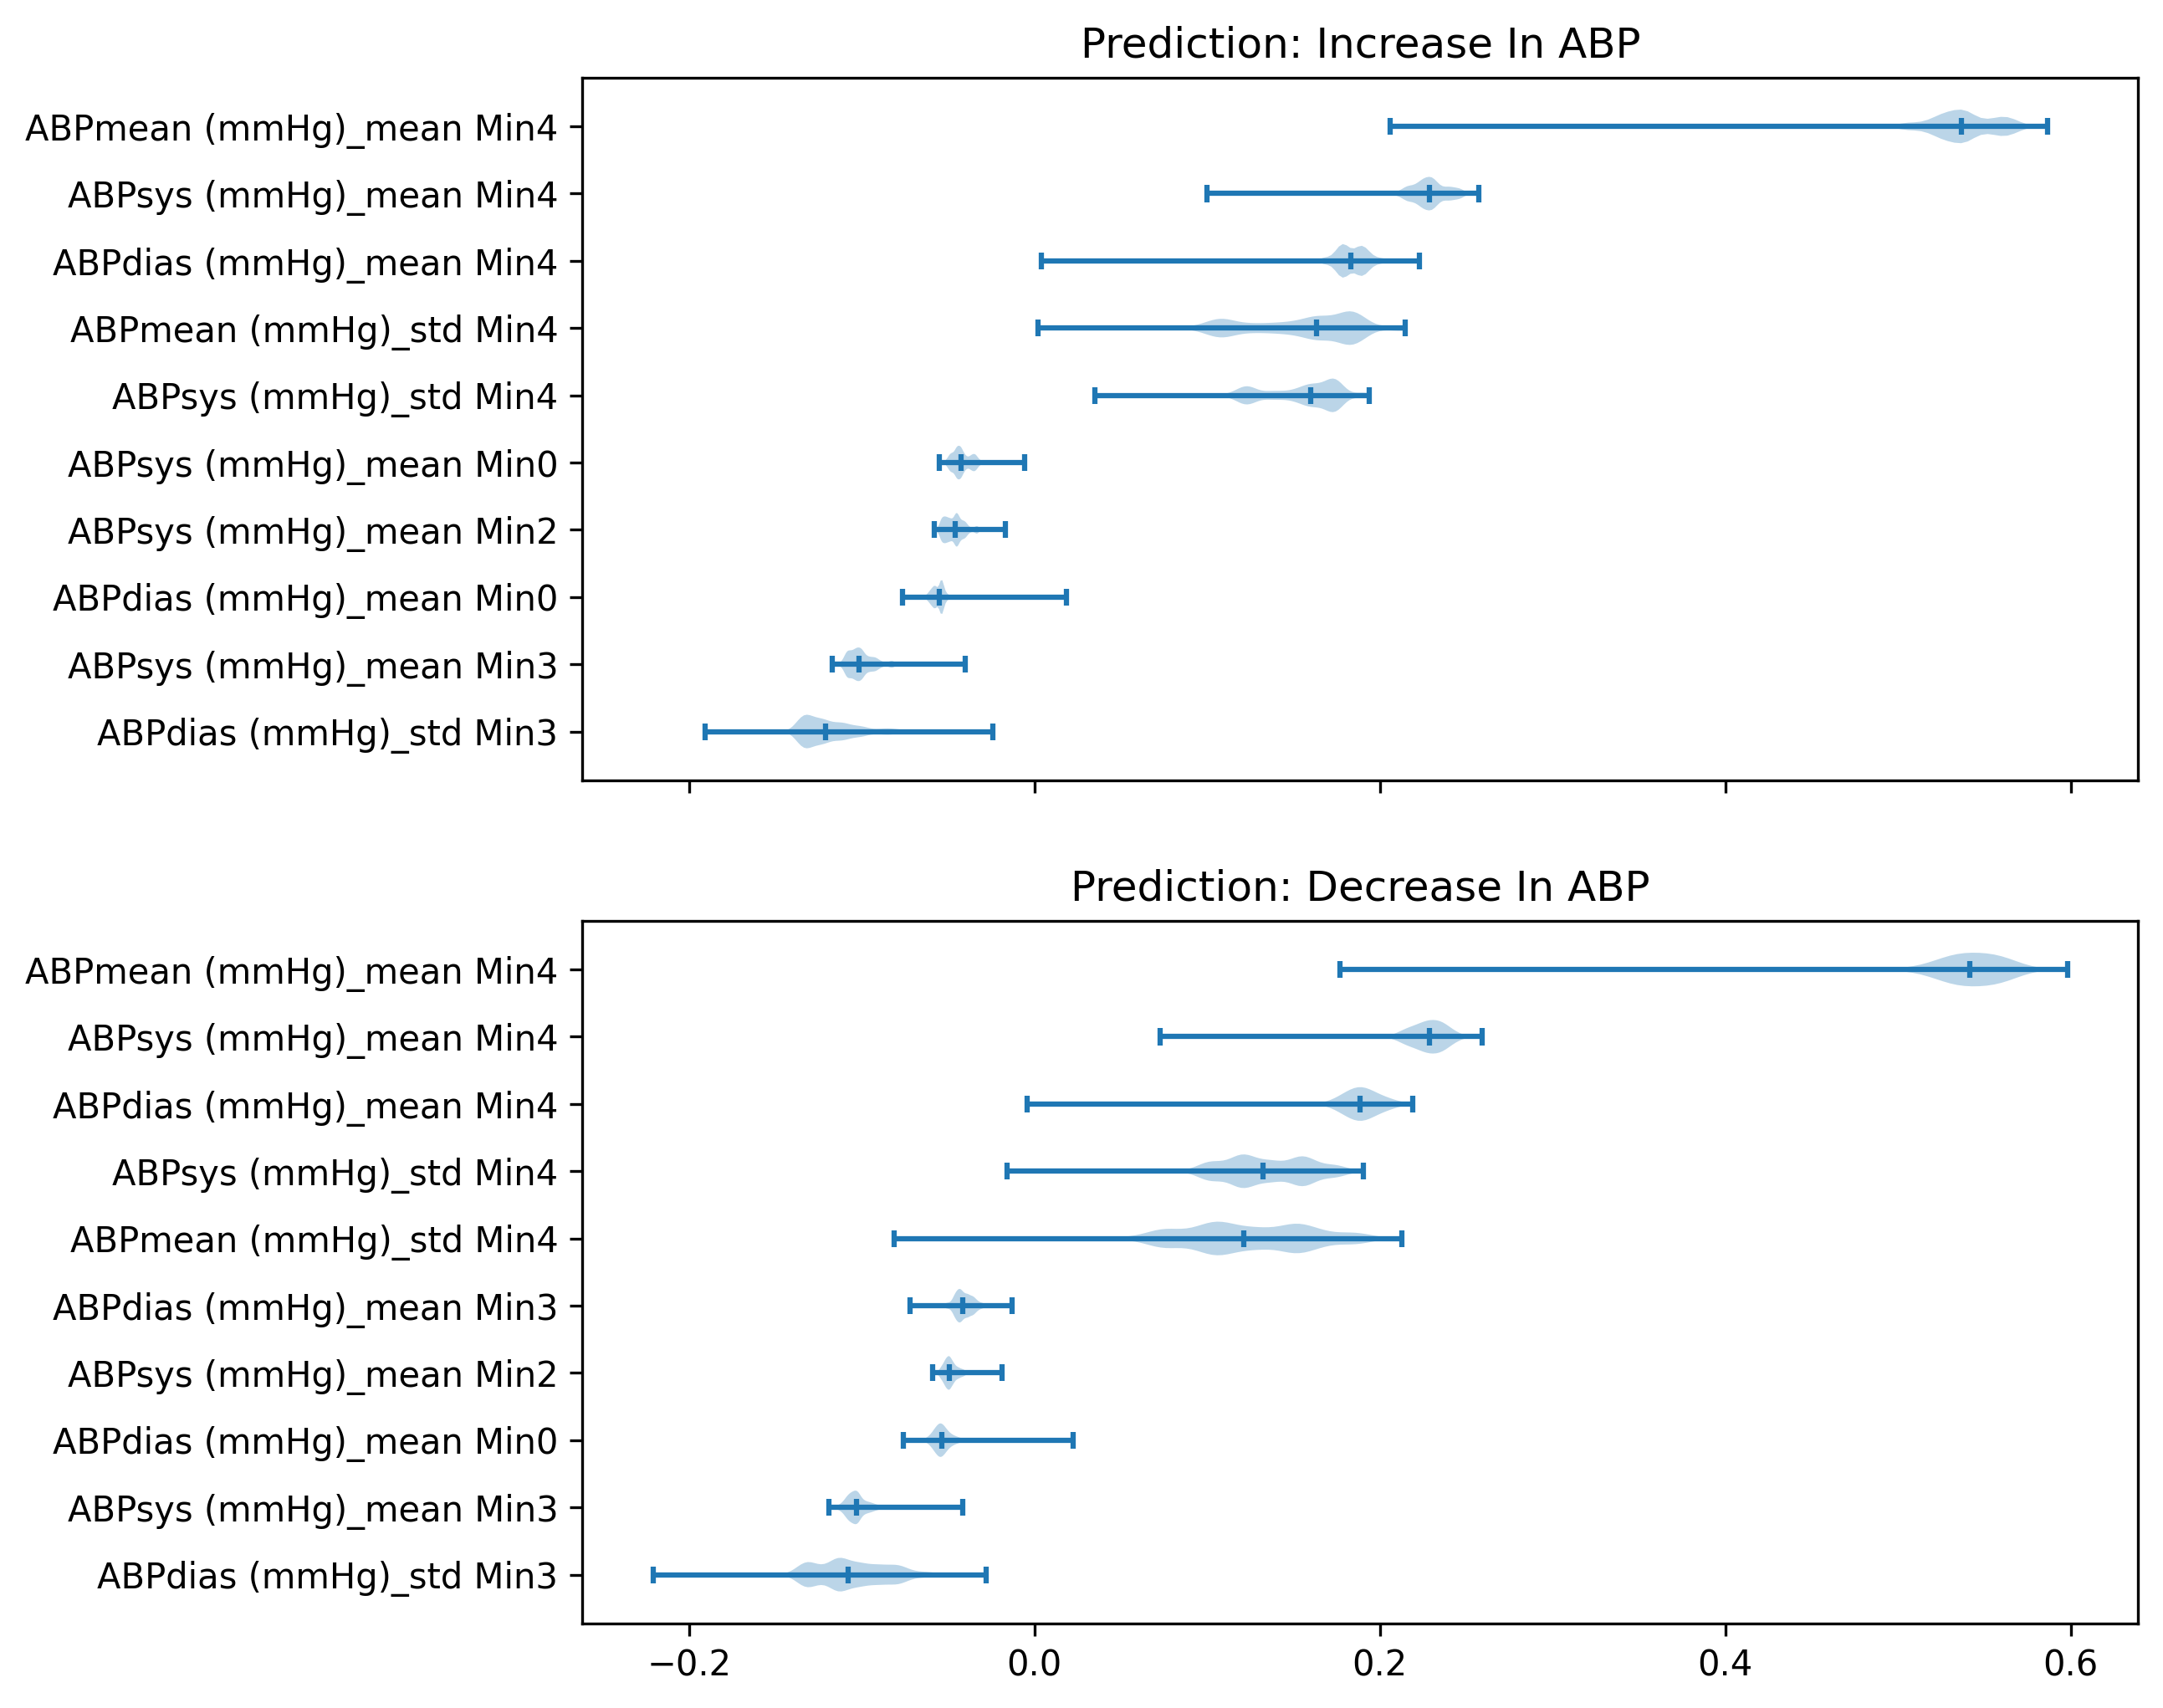

In [159]:
# Explanations without threshold (Random sampling)
def get_explanations_wo_uncertainty(gradients_df, top_n=10):
    grad_cols = [col for col in gradients_df if "_grad" in col]
    correct_df = gradients_df.sample(frac=0.25)
    print(correct_df.shape)
#     correct_df = gradients_df[
#         gradients_df["target_increased"] == gradients_df["target_pred_increased"]]
    classes = {"Prediction: Increase In ABP":True, "Prediction: Decrease In ABP":False}
    fig, axes = plt.subplots(2, 1, figsize=(8, 8), dpi=300, sharex=True)
    for i, (direction, boolean_val) in enumerate(classes.items()):
        dir_df = correct_df[correct_df["target_pred_increased"]==boolean_val]
        dir_expl = dir_df[grad_cols].mean()
        dir_expl = dir_expl.sort_values()
        half_top_n = top_n//2
        dir_expl = pd.concat([dir_expl.iloc[:half_top_n], dir_expl.iloc[-half_top_n:]])
        top_cols = [col[:-5] for col in dir_expl.index]
        top_grads = dir_df[dir_expl.index]
        axes[i].violinplot(top_grads, showmedians=True, vert=False)
        axes[i].set_yticks(range(1, len(top_cols)+1))
        axes[i].set_yticklabels(top_cols)
#         axes[i].barh(y=top_cols, width=top_grads)
        axes[i].set_title(direction)
    
get_explanations_wo_uncertainty(gradients_test)

(4804, 125)


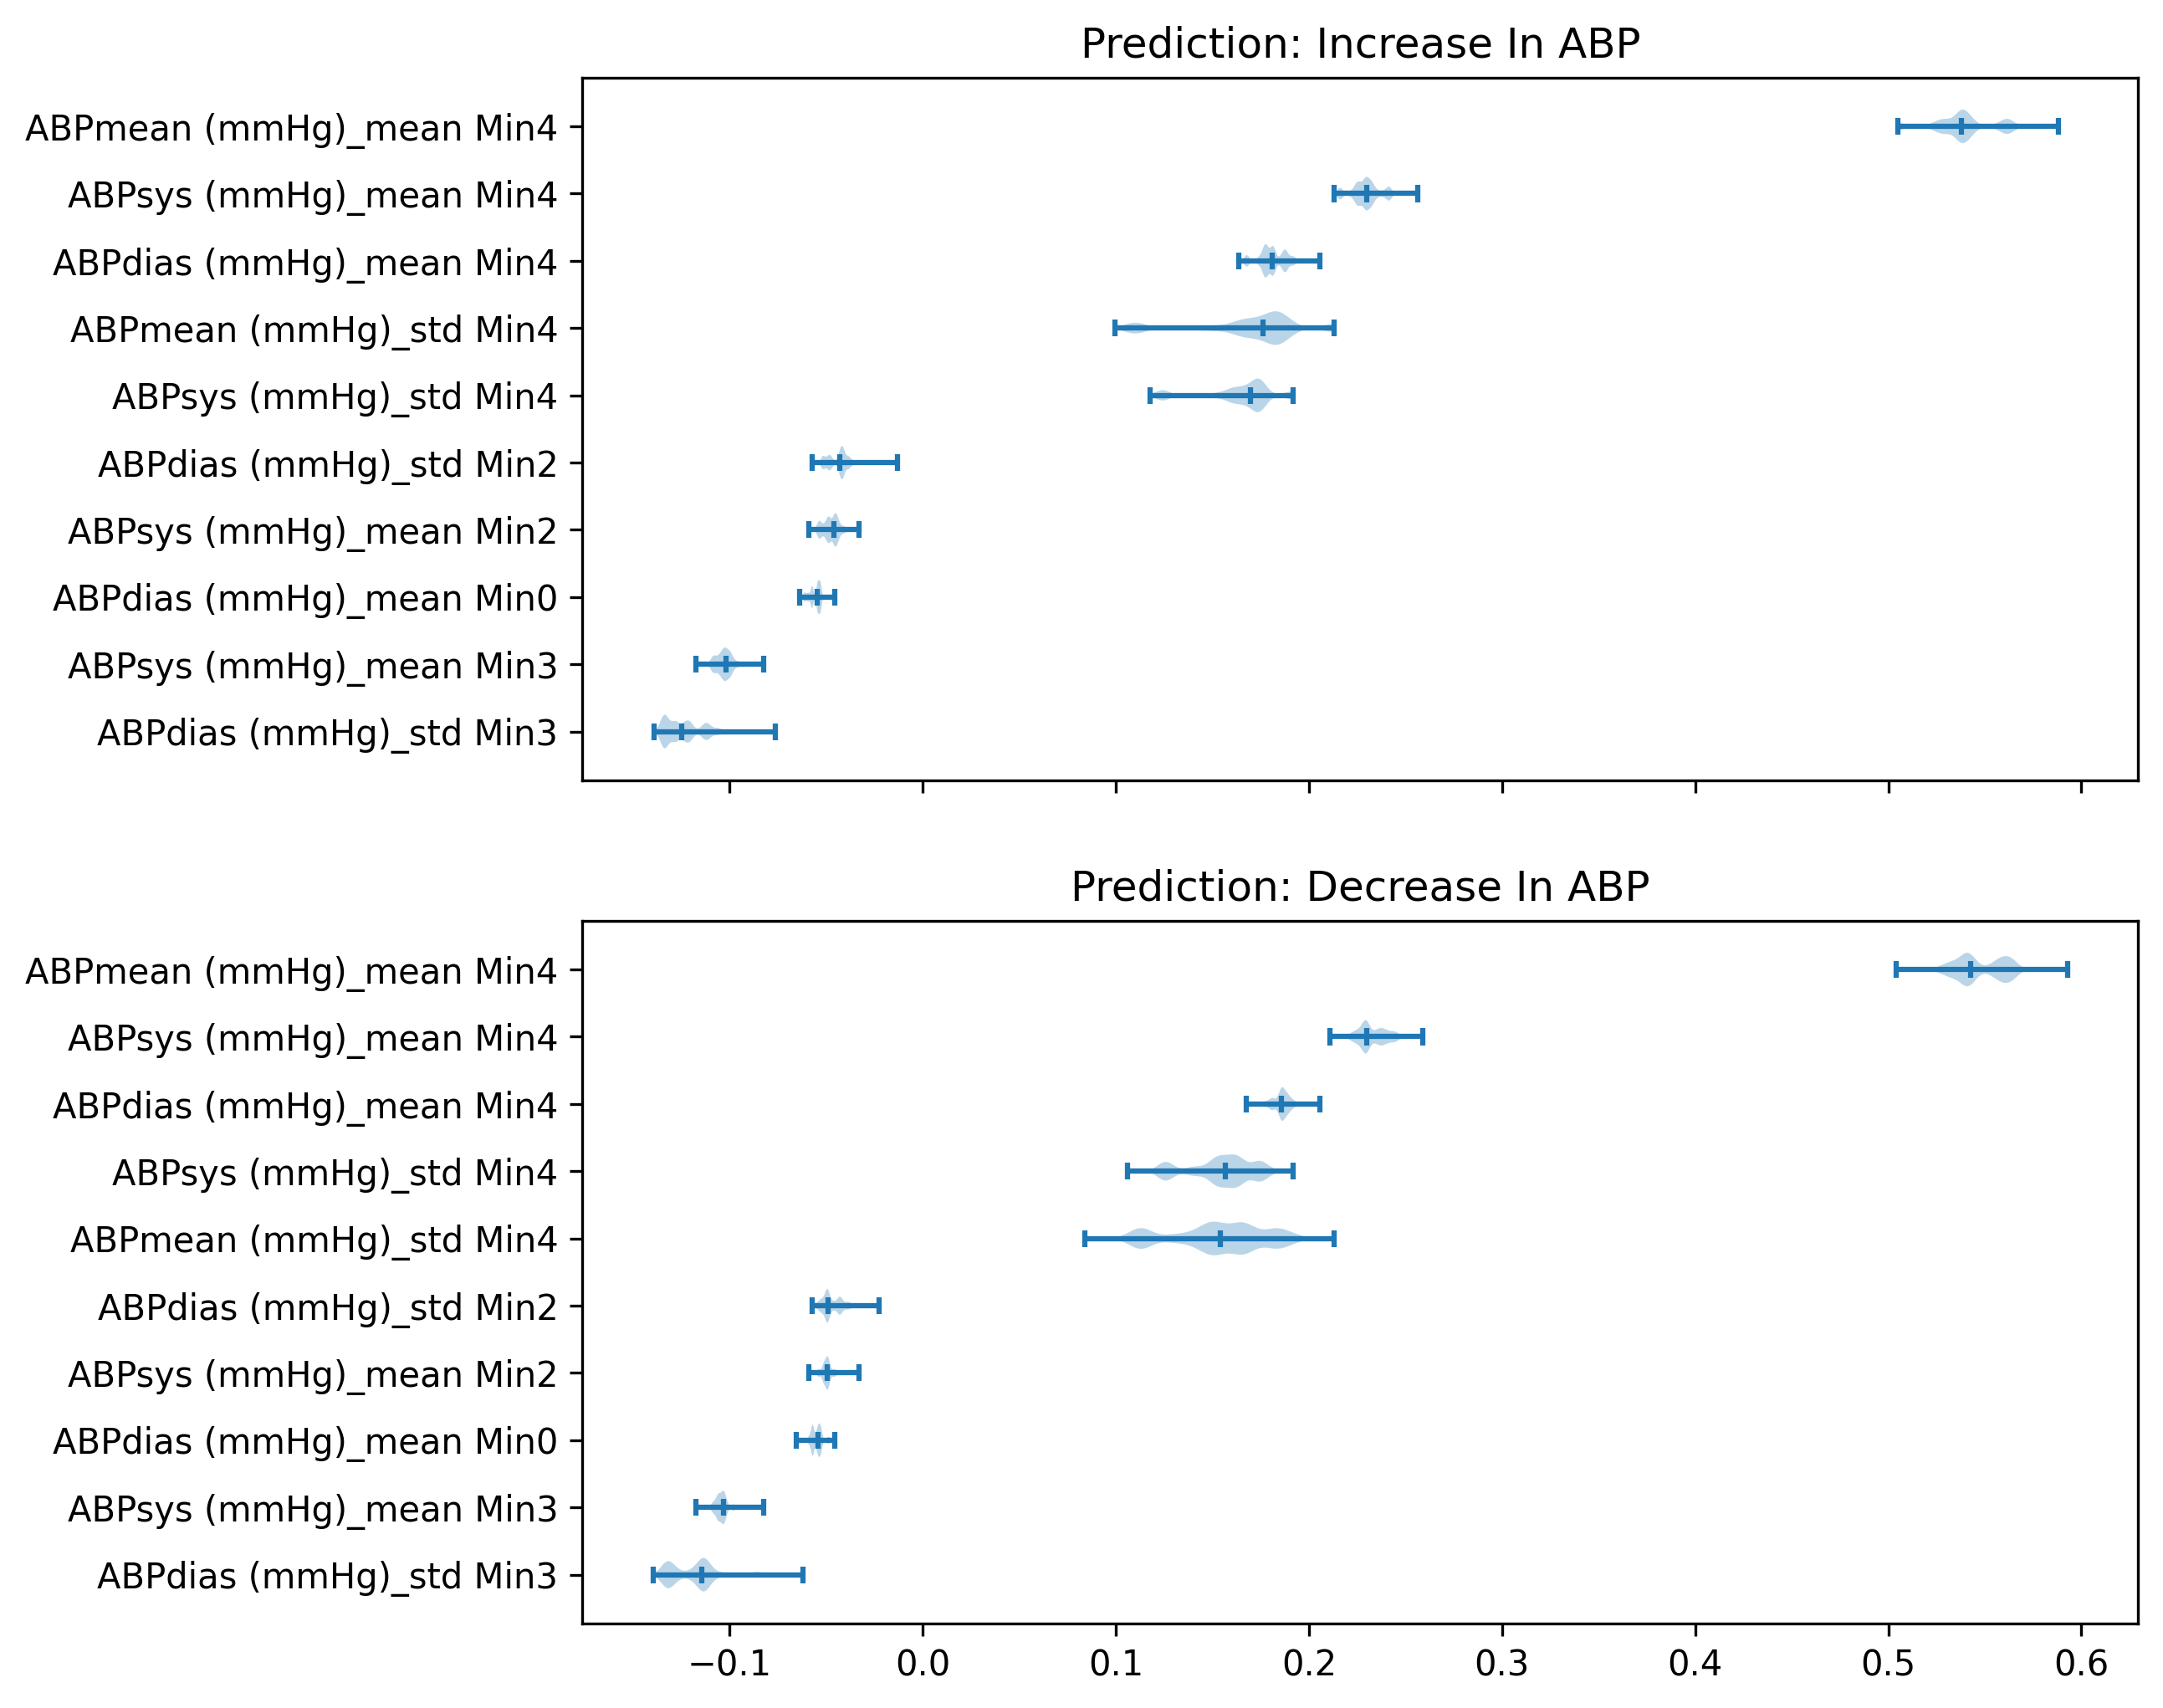

In [107]:
# Explanations thresholded with uncertainty
def get_explanations_w_uncertainty_mostconf(gradients_df, top_n=10):
    grad_cols = [col for col in gradients_df if "_grad" in col]
    correct_df = gradients_df[
        gradients_df["mae"] < gradients_df["mae"].quantile(0.25)
    ]
    print(correct_df.shape)
#     correct_df = gradients_df[
#         gradients_df["target_increased"] == gradients_df["target_pred_increased"]]
    classes = {"Prediction: Increase In ABP":True, "Prediction: Decrease In ABP":False}
    fig, axes = plt.subplots(2, 1, figsize=(8, 8), dpi=300, sharex=True)
    for i, (direction, boolean_val) in enumerate(classes.items()):
        dir_df = correct_df[correct_df["target_pred_increased"]==boolean_val]
        dir_expl = dir_df[grad_cols].mean()
        dir_expl = dir_expl.sort_values()
        half_top_n = top_n//2
        dir_expl = pd.concat([dir_expl.iloc[:half_top_n], dir_expl.iloc[-half_top_n:]])
        top_cols = [col[:-5] for col in dir_expl.index]
        top_grads = dir_df[dir_expl.index]
        axes[i].violinplot(top_grads, showmedians=True, vert=False)
        axes[i].set_yticks(range(1, len(top_cols)+1))
        axes[i].set_yticklabels(top_cols)
#         axes[i].barh(y=top_cols, width=top_grads)
        axes[i].set_title(direction)
get_explanations_w_uncertainty_mostconf(gradients_test)

(4804, 125)


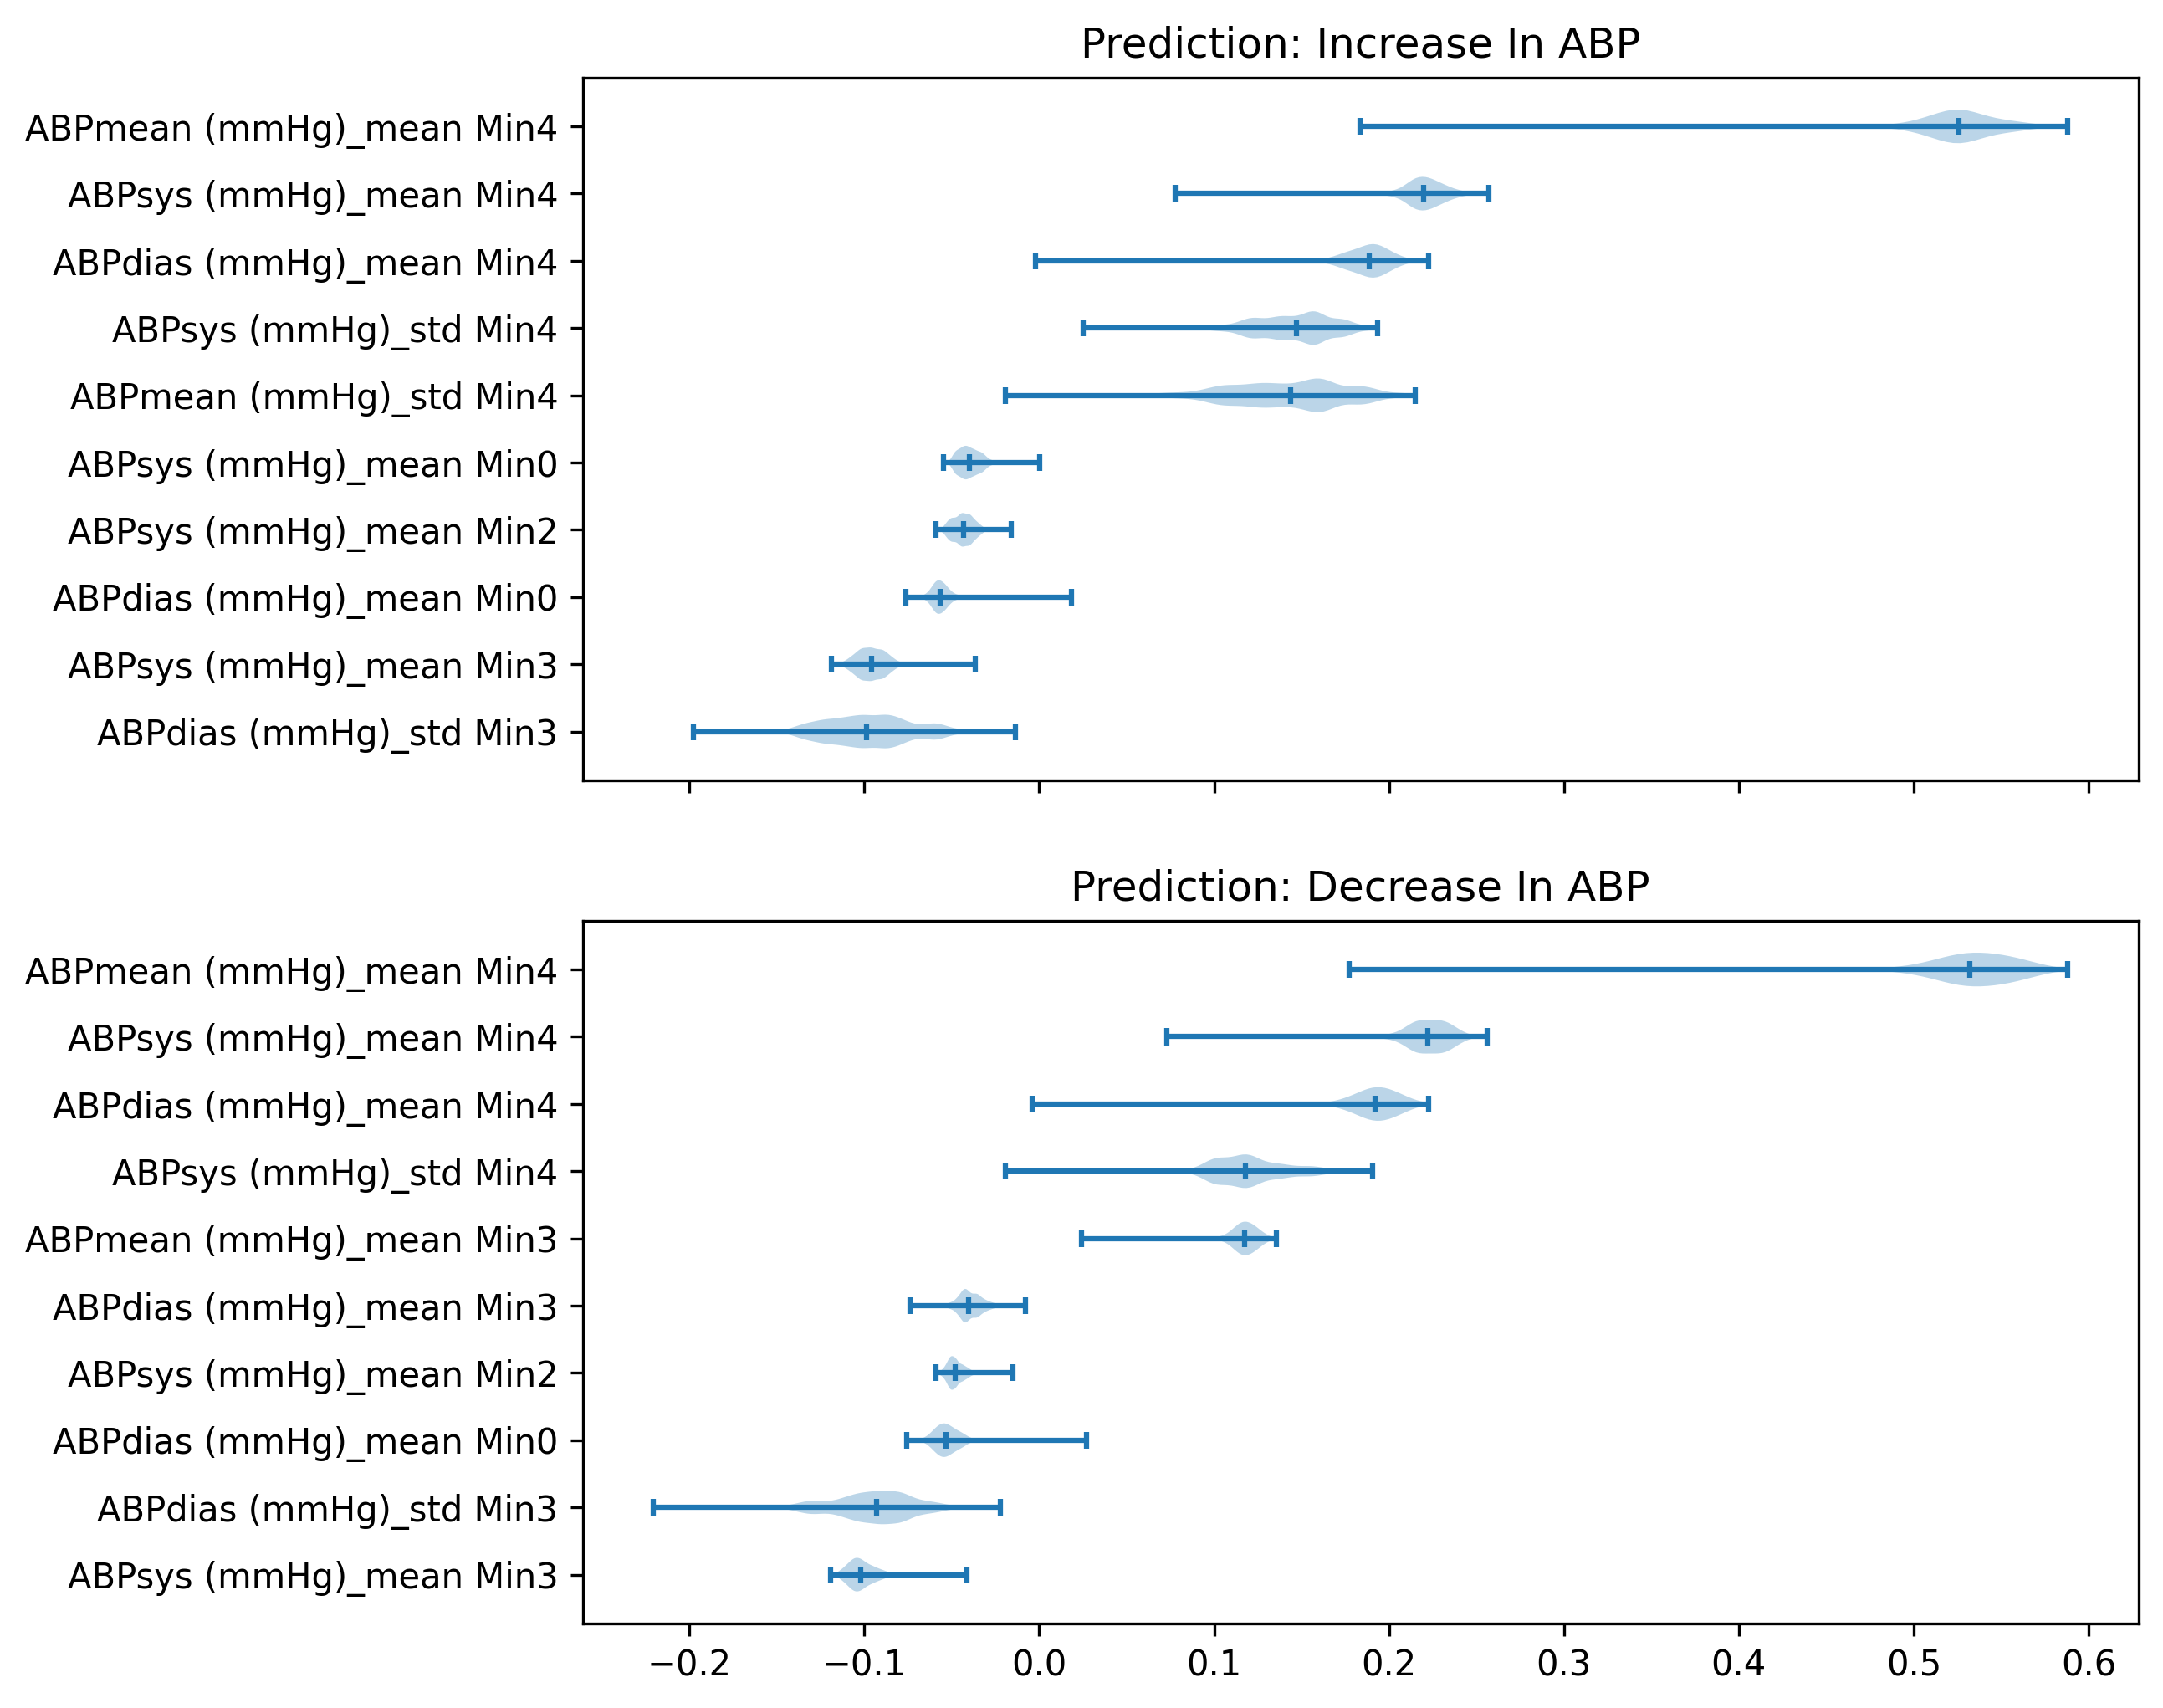

In [109]:
def get_explanations_w_uncertainty_leastconf(gradients_df, top_n=10):
    grad_cols = [col for col in gradients_df if "_grad" in col]
    correct_df = gradients_df[
        gradients_df["mae"] > gradients_df["mae"].quantile(0.75)
    ]
    print(correct_df.shape)
#     correct_df = gradients_df[
#         gradients_df["target_increased"] == gradients_df["target_pred_increased"]]
    classes = {"Prediction: Increase In ABP":True, "Prediction: Decrease In ABP":False}
    fig, axes = plt.subplots(2, 1, figsize=(8, 8), dpi=300, sharex=True)
    for i, (direction, boolean_val) in enumerate(classes.items()):
        dir_df = correct_df[correct_df["target_pred_increased"]==boolean_val]
        dir_expl = dir_df[grad_cols].mean()
        dir_expl = dir_expl.sort_values()
        half_top_n = top_n//2
        dir_expl = pd.concat([dir_expl.iloc[:half_top_n], dir_expl.iloc[-half_top_n:]])
        top_cols = [col[:-5] for col in dir_expl.index]
        top_grads = dir_df[dir_expl.index]
        axes[i].violinplot(top_grads, showmedians=True, vert=False)
        axes[i].set_yticks(range(1, len(top_cols)+1))
        axes[i].set_yticklabels(top_cols)
#         axes[i].barh(y=top_cols, width=top_grads)
        axes[i].set_title(direction)
get_explanations_w_uncertainty_leastconf(gradients_test)

### Can Explanations Improve Uncertainty Scores

(19215, 60)
(19215, 60)
(19215, 60)
(19215,)
tf.Tensor([0.04584639 0.07536902 0.11236446 ... 0.2859191  0.30851015 0.31543595], shape=(19215,), dtype=float32)
MSE: 0.13248022
MAE-SE Correlation: 0.8184789658733309


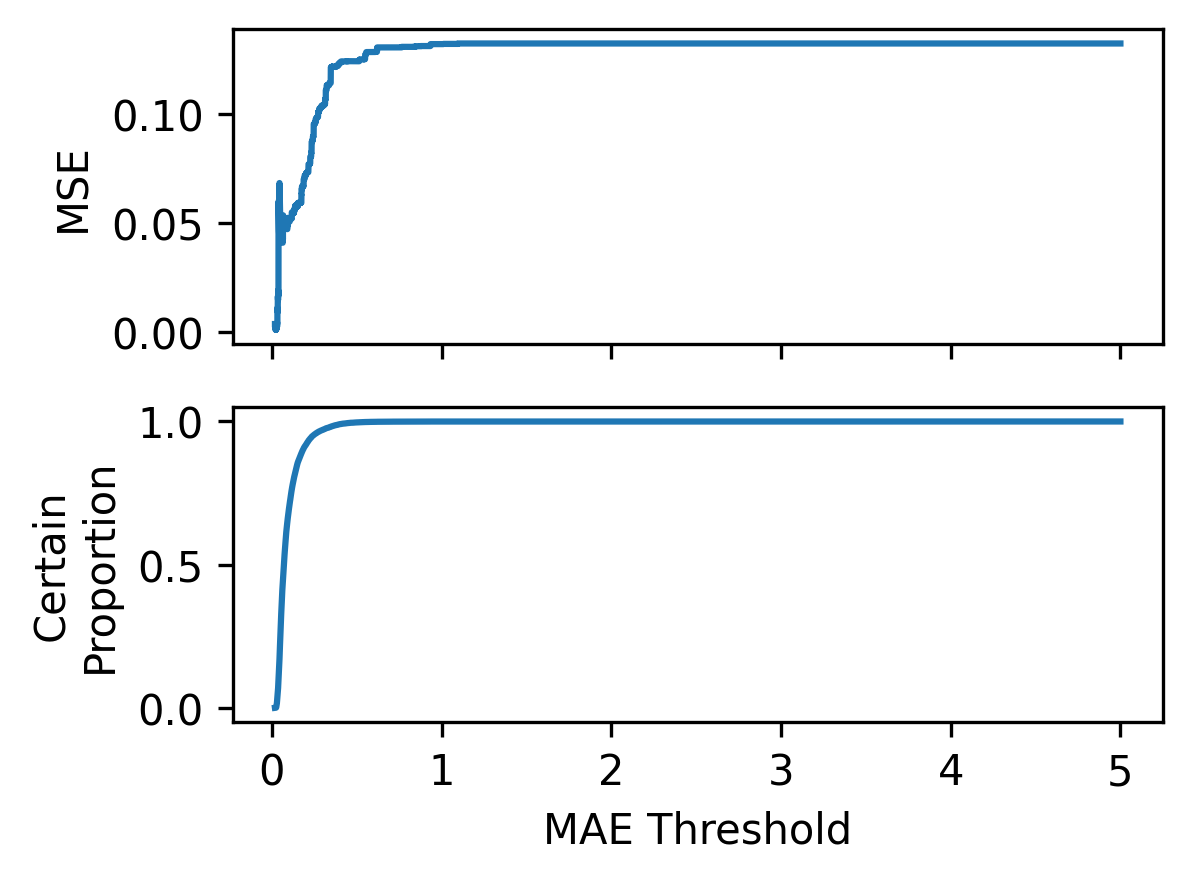

In [168]:
model_evaluation(ae_regressor, df_test, pred_col, predictors, weighted=False)

(19215, 60)
(19215, 60)
Weighted
tf.Tensor(
[[0.01673898 0.01642771 0.0158666  ... 0.01590956 0.01611007 0.01771417]
 [0.01685688 0.01650341 0.01596284 ... 0.01592575 0.01610934 0.01807867]
 [0.01674159 0.01643071 0.01586323 ... 0.01591395 0.0161083  0.01769482]
 ...
 [0.01684284 0.01652562 0.01624673 ... 0.01595322 0.01597256 0.01900082]
 [0.01684792 0.01638029 0.01634685 ... 0.01596627 0.01604657 0.01896808]
 [0.01684444 0.01640912 0.0163197  ... 0.01596441 0.01604035 0.01892645]], shape=(19215, 60), dtype=float32)
(19215, 60)
(19215,)
tf.Tensor([0.04542886 0.07363144 0.10961956 ... 0.27750745 0.3011013  0.3077554 ], shape=(19215,), dtype=float32)
MSE: 0.13248022
MAE-SE Correlation: 0.8184789658733309


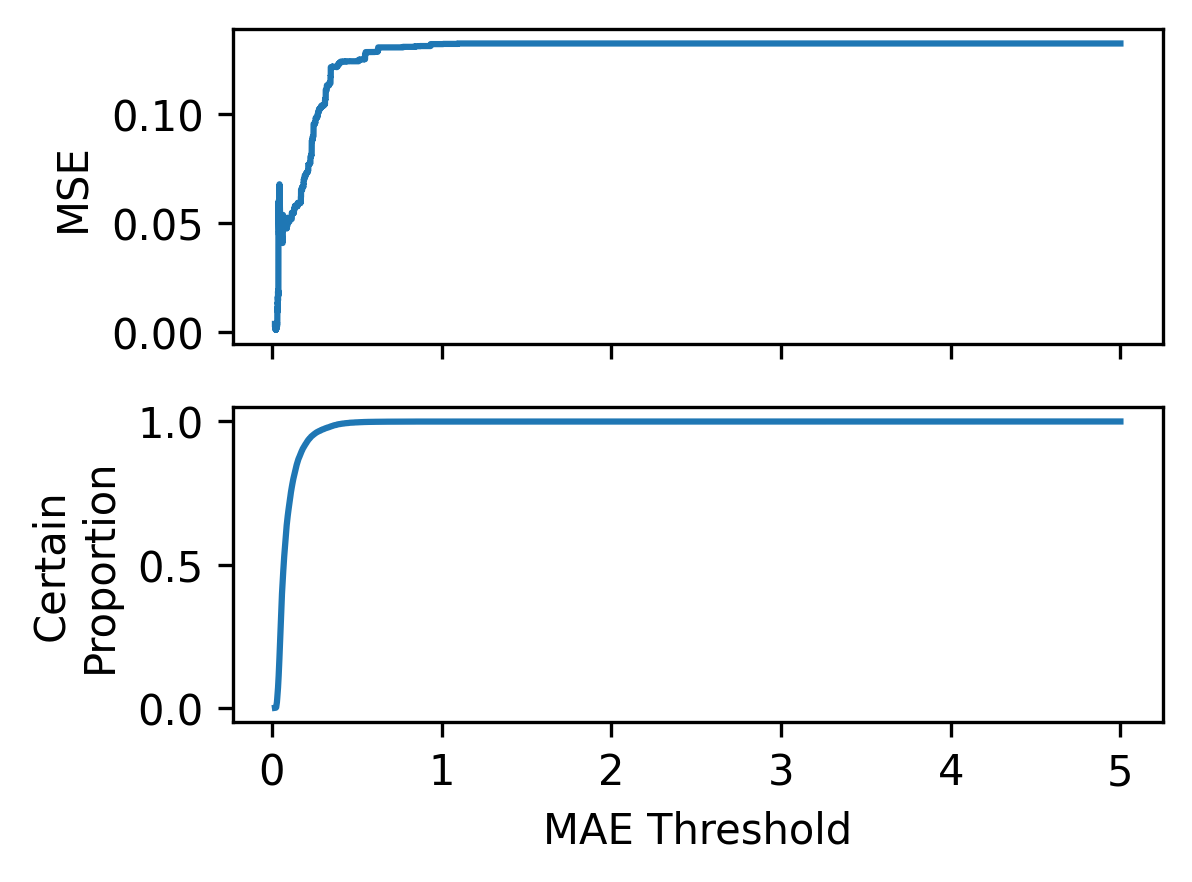

In [169]:
model_evaluation(ae_regressor, df_test, pred_col, predictors, weighted=True)